In [1]:
import yt
import numpy as np

In [6]:
plot_num = 100
diag_num = 100
plot_num += 1000000
diag_num += 1000000
plot_num_list = list(str(plot_num))
diag_num_list = list(str(diag_num))
plot_num_list[0] = '0'
diag_num_list[0] = '0'
plotname = "plt"+"".join(plot_num_list)
diagname = "diag"+"".join(diag_num_list)

In [7]:
dplot = yt.load(plotname)
ddiag = yt.load(diagname)

yt : [INFO     ] 2020-12-03 15:01:35,845 Parameters: current_time              = 0.2343750000000004
yt : [INFO     ] 2020-12-03 15:01:35,846 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2020-12-03 15:01:35,846 Parameters: domain_left_edge          = [-50. -50. -50.]
yt : [INFO     ] 2020-12-03 15:01:35,847 Parameters: domain_right_edge         = [ 50.  50.  50.]
yt : [INFO     ] 2020-12-03 15:01:35,864 Parameters: current_time              = 0.2343750000000004
yt : [INFO     ] 2020-12-03 15:01:35,864 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2020-12-03 15:01:35,865 Parameters: domain_left_edge          = [-50. -50. -50.]
yt : [INFO     ] 2020-12-03 15:01:35,866 Parameters: domain_right_edge         = [ 50.  50.  50.]


In [8]:
print(dplot.field_list)
print(ddiag.field_list)

[('boxlib', 'u')]
[('boxlib', 'alpha'), ('boxlib', 'chi')]


yt : [INFO     ] 2020-12-03 15:01:58,081 xlim = -50.000000 50.000000
yt : [INFO     ] 2020-12-03 15:01:58,082 ylim = -50.000000 50.000000
yt : [INFO     ] 2020-12-03 15:01:58,084 xlim = -50.000000 50.000000
yt : [INFO     ] 2020-12-03 15:01:58,084 ylim = -50.000000 50.000000
yt : [INFO     ] 2020-12-03 15:01:58,086 Making a fixed resolution buffer of (('boxlib', 'u')) 800 by 800
yt : [INFO     ] 2020-12-03 15:01:58,185 Making a fixed resolution buffer of (('boxlib', 'u')) 800 by 800



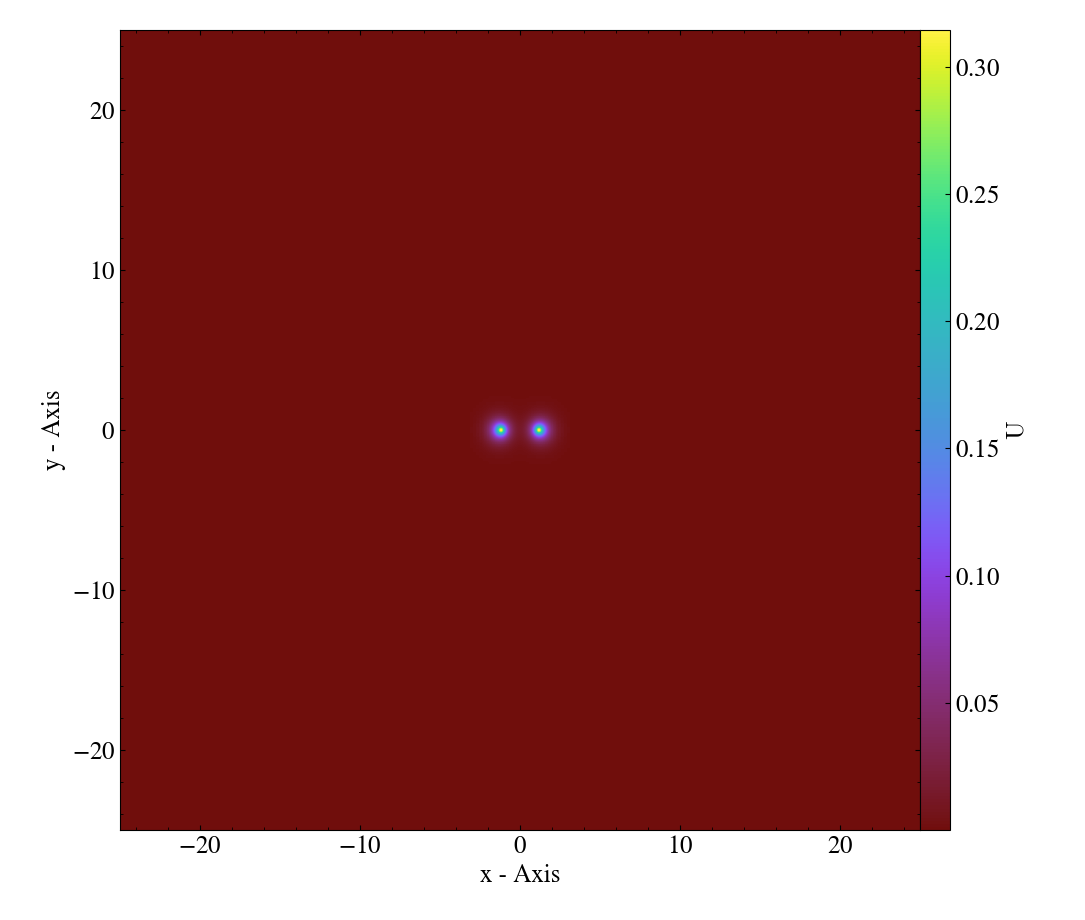

yt : [INFO     ] 2020-12-03 15:01:58,569 xlim = -50.000000 50.000000
yt : [INFO     ] 2020-12-03 15:01:58,569 ylim = -50.000000 50.000000
yt : [INFO     ] 2020-12-03 15:01:58,571 xlim = -50.000000 50.000000
yt : [INFO     ] 2020-12-03 15:01:58,572 ylim = -50.000000 50.000000
yt : [INFO     ] 2020-12-03 15:01:58,573 Making a fixed resolution buffer of (('boxlib', 'alpha')) 800 by 800
yt : [INFO     ] 2020-12-03 15:01:58,670 Making a fixed resolution buffer of (('boxlib', 'alpha')) 800 by 800



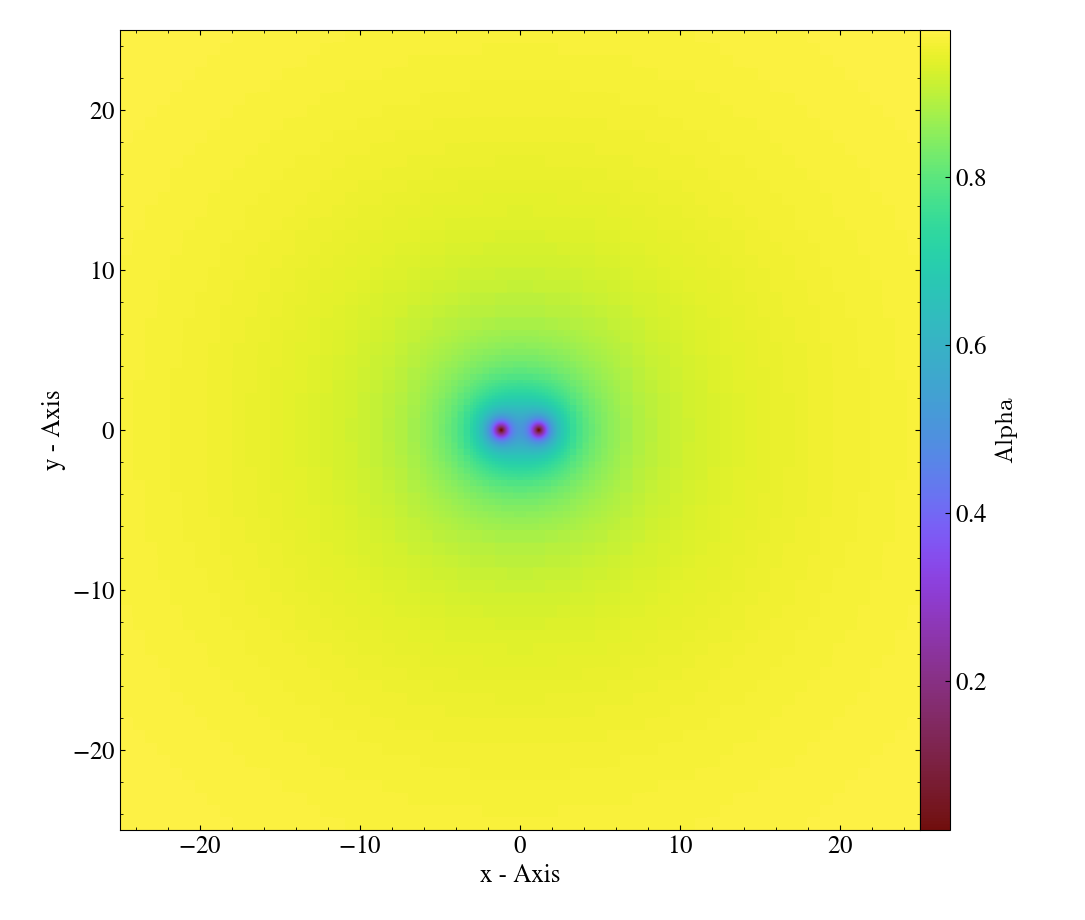

In [11]:
var = 'u'
s = yt.SlicePlot(dplot, 'z', ('boxlib', var), origin='native')
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.hide_colorbar()
#s.annotate_cell_edges()
#s.annotate_grids()
s.zoom(2)
s.show()

var = 'alpha'
s = yt.SlicePlot(ddiag, 'z', ('boxlib', var), origin='native')
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.hide_colorbar()
#s.annotate_cell_edges()
#s.annotate_grids()
s.zoom(2)
s.show()

yt : [INFO     ] 2020-05-06 13:55:18,089 xlim = -75.000000 75.000000
yt : [INFO     ] 2020-05-06 13:55:18,089 ylim = -75.000000 75.000000
yt : [INFO     ] 2020-05-06 13:55:18,092 xlim = -75.000000 75.000000
yt : [INFO     ] 2020-05-06 13:55:18,092 ylim = -75.000000 75.000000
yt : [INFO     ] 2020-05-06 13:55:18,094 Making a fixed resolution buffer of (('boxlib', 'u')) 800 by 800
yt : [INFO     ] 2020-05-06 13:55:18,187 Making a fixed resolution buffer of (('boxlib', 'u')) 800 by 800



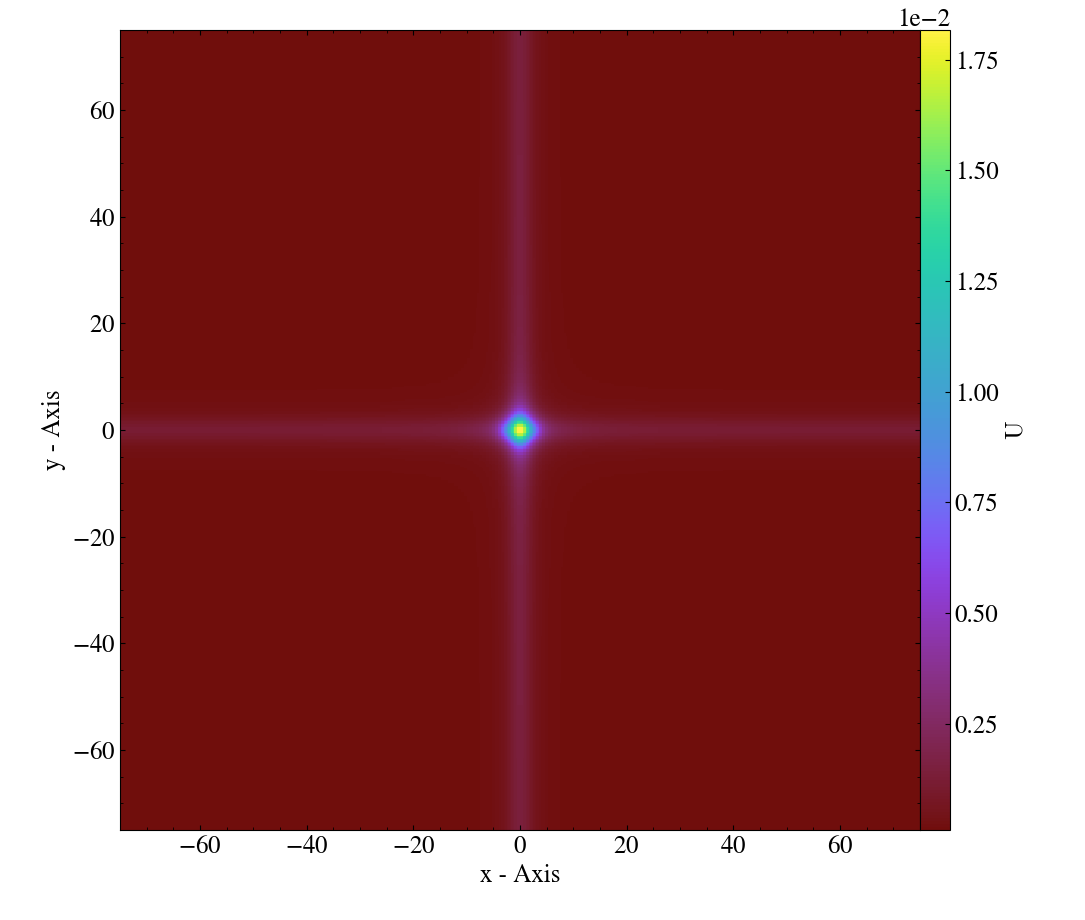

In [31]:
var = 'u'
s = yt.SlicePlot(ds, 'z', ('boxlib', var), origin='native')
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.hide_colorbar()
#s.annotate_cell_edges()
s.zoom(1)
s.show()

In [68]:
s.save("phi_t400.pdf")

yt : [INFO     ] 2020-05-05 15:32:40,763 Saving plot phi_t400.pdf


['phi_t400.pdf']

In [ ]:
var = 'phi'
for i in range(301):
    ident = list(str(int(5*i)+10000))
    ident[0] = '0'
    filename = "plt00"+"".join(ident)
    ds = yt.load(filename)
    s = yt.SlicePlot(ds, 'z', ('boxlib', var), origin='native', center = [0,0,0])
    s.set_log(('boxlib', var), False)
    s.set_xlabel('x - Axis')
    s.set_ylabel('y - Axis')
    s.hide_colorbar()
    #s.annotate_cell_edges()
    s.zoom(2)
    
    ident2 = list(str(i+10000))
    ident2[0] = '0'
    s.save("img"+"".join(ident2)+".png")

In [76]:
cg = ds.covering_grid(left_edge=ds.domain_left_edge, dims=ds.domain_dimensions, level=0)
coords = cg.fcoords

xs = coords[:,0]
ys = coords[:,1]
zs = coords[:,2]

dx = np.max(xs[1:] - xs[:-1])
dy = np.max(ys[1:] - ys[:-1])
dz = np.max(zs[1:] - zs[:-1])

H = cg["u"][:,:,:].d

In [77]:
H[64, 64, 64]

0.0081254919985896176

In [49]:
H[64, 64, 64]

1.2775443176769271e-10

In [49]:
H[0, 0, 0]

0.0010225271343679068